In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import prince
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('./données/VisaPremier.txt',sep="\t")

In [3]:
df.shape

(1073, 48)

In [41]:
df.info()
#y a pas de valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 48 columns):
matricul    1073 non-null int64
departem    1073 non-null object
ptvente     1073 non-null int64
sexe        1073 non-null object
age         1073 non-null int64
sitfamil    1073 non-null object
anciente    1073 non-null int64
csp         1073 non-null object
codeqlt     1073 non-null object
nbimpaye    1073 non-null int64
mtrejet     1073 non-null int64
nbopguic    1073 non-null int64
moycred3    1073 non-null int64
aveparmo    1073 non-null int64
endette     1073 non-null int64
engagemt    1073 non-null int64
engagemc    1073 non-null int64
engagemm    1073 non-null int64
nbcptvue    1073 non-null int64
moysold3    1073 non-null int64
moycredi    1073 non-null int64
agemvt      1073 non-null object
nbop        1073 non-null int64
mtfactur    1073 non-null int64
engageml    1073 non-null int64
nbvie       1073 non-null int64
mtvie       1073 non-null int64
nbeparmo    1073 non-nu

In [42]:
df.describe(include='all')

,matricul,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,nbimpaye,...,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,cartevp,sexer,cartevpr,nbjdebit
count,1.073000e+03,1073,1073.00000,1073,1073.000000,1073,1073.000000,1073,1073,1073.0,...,1.073000e+03,1073,1073.000000,1073.000000,1.073000e+03,1.073000e+03,1073,1073.000000,1073.000000,1073.000000
unique,NaN,34,NaN,2,NaN,7,NaN,8,6,NaN,...,NaN,56,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,31,NaN,Shom,NaN,Fmar,NaN,Pcad,B,NaN,...,NaN,.,NaN,NaN,NaN,NaN,Cnon,NaN,NaN,NaN
freq,NaN,691,NaN,668,NaN,547,NaN,446,303,NaN,...,NaN,278,NaN,NaN,NaN,NaN,714,NaN,NaN,NaN
mean,2.489307e+06,NaN,1.66356,NaN,42.532153,NaN,157.117428,NaN,NaN,0.0,...,1.817335e+04,NaN,1.069897,0.136067,1.468193e+05,5.072736e+04,NaN,0.377446,0.334576,12.084809
std,1.925341e+06,NaN,1.08567,NaN,11.905142,NaN,156.065121,NaN,NaN,0.0,...,5.952984e+05,NaN,0.868047,0.379186,7.377687e+05,3.399783e+05,NaN,0.484974,0.472062,23.335589
min,1.133330e+05,NaN,1.00000,NaN,18.000000,NaN,1.000000,NaN,NaN,0.0,...,0.000000e+00,NaN,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000,0.000000,0.000000
25%,8.604360e+05,NaN,1.00000,NaN,33.000000,NaN,45.000000,NaN,NaN,0.0,...,0.000000e+00,NaN,0.000000,0.000000,3.184000e+03,0.000000e+00,NaN,0.000000,0.000000,0.000000
50%,1.948586e+06,NaN,1.00000,NaN,43.000000,NaN,136.000000,NaN,NaN,0.0,...,0.000000e+00,NaN,1.000000,0.000000,2.399300e+04,0.000000e+00,NaN,0.000000,0.000000,0.000000
75%,3.901594e+06,NaN,2.00000,NaN,52.000000,NaN,216.000000,NaN,NaN,0.0,...,0.000000e+00,NaN,2.000000,0.000000,1.148070e+05,5.000000e+02,NaN,1.000000,1.000000,10.000000


un caractere speciale qui signifie que la valeur n'est pas connue 

In [32]:
df.isin(['.']).sum(axis=0)

matricul      0
departem      7
ptvente       0
sexe          0
age           0
sitfamil      0
anciente      0
csp           0
codeqlt     133
nbimpaye      0
mtrejet       0
nbopguic      0
moycred3      0
aveparmo      0
endette       0
engagemt      0
engagemc      0
engagemm      0
nbcptvue      0
moysold3      0
moycredi      0
agemvt        6
nbop          0
mtfactur      0
engageml      0
nbvie         0
mtvie         0
nbeparmo      0
mteparmo      0
nbeparlo      0
mteparlo      0
nblivret      0
mtlivret      0
nbeparlt      0
mteparlt      0
nbeparte      0
mteparte      0
nbbon         0
mtbon         0
nbpaiecb    278
nbcb          0
nbcbptar      0
avtscpte      0
aveparfi      0
cartevp       0
sexer         0
cartevpr      0
nbjdebit      0
dtype: int64

In [49]:
#les variable de type categorial
[i for i, x in enumerate((df.dtypes==object)) if x]

[1, 3, 5, 7, 8, 21, 39, 44]

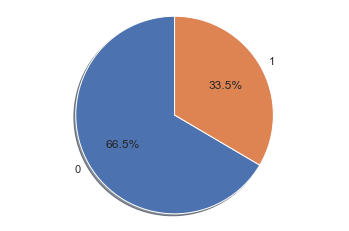

In [43]:
#la proportion des valeurs de la vaiable à predire 
t=df['cartevpr'].value_counts()
ind=t.index
t=t.reset_index(drop=True)
fig1, ax1 = plt.subplots()
ax1.pie(t, labels=ind, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

# Analyse et nettoyage des données catégorielles

In [33]:
df_cat=df.iloc[:,[1, 3, 5, 7, 8, 21, 39, 44]]
#2 variable 'sexe' et 'cartevp' sont deja utiliser en binaire donc on doit les supprimer 
df_cat=df_cat.iloc[:,[0,2,3,4,5,6]].astype('category')
df_cat

,departem,sitfamil,csp,codeqlt,agemvt,nbpaiecb
0,31,Fmar,Pcad,A,11,14
1,82,Fmar,Pcad,A,11,5
2,97,Fmar,Pcad,C,14,0
3,40,Fcel,Psan,B,11,14
4,65,Fsep,Pemp,A,11,11
...,...,...,...,...,...,...
1068,31,Fmar,Psan,.,0,.
1069,31,Fmar,Pcad,.,0,.
1070,32,Fmar,Pemp,B,13,9
1071,65,F.,Psan,D,13,2


In [47]:
mca = prince.MCA(
     n_components=2,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42 )
mca = mca.fit(X)

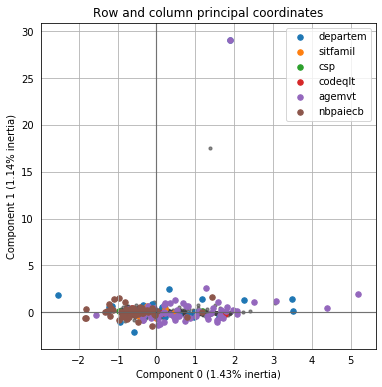

In [20]:
ax = mca.plot_coordinates(
       X=df_cat,
       ax=None,
       figsize=(6, 6),
       show_row_points=True,
       row_points_size=10,
       show_row_labels=False,
       show_column_points=True,
       column_points_size=30,
       show_column_labels=False,
       legend_n_cols=1 )
ax.get_figure().savefig('mca_coordinates.svg')

In [6]:
df_cat.codeqlt.value_counts()
#on peut extraires des nouvelles variables a partir des modalité de cette var en utilisant get_dummies 

B    303
C    218
A    207
D    168
.    133
E     44
Name: codeqlt, dtype: int64

In [34]:
d=pd.get_dummies(df_cat['codeqlt'], prefix='codeqlt')
df_cat.drop(['codeqlt','nbpaiecb'],axis=1,inplace=True)
d.drop('codeqlt_.',axis=1,inplace=True)
df_Cat = pd.concat([df_cat, d], axis=1, sort=False)

In [36]:
df_Cat.departem.value_counts()
#7 valeur avec la modalité . qui montre une absence d'information

31    691
65    141
82     69
32     69
75     14
64      9
97      8
9       7
31      7
81      7
92      6
11      5
66      4
13      3
40      3
47      3
94      3
24      3
33      2
69      2
17      2
46      2
12      2
78      1
34      1
77      1
45      1
56      1
63      1
16      1
95      1
54      1
6       1
14      1
Name: departem, dtype: int64

In [35]:
#replace '.' par la valeur la plus frequente 31
df_Cat=df_Cat.replace('.',31)

In [37]:
# pour pouvoir utiliser cette variable dans les algo de ML on doit la convertir sous format numerque avec labelencoder
#parce que on a des modalité avec un ou deux valeurs on ne peut pas creer une nouvelle variable avec une seule valeur de 1
df_Cat.csp.value_counts()

Pcad     446
Pemp     288
Psan     199
Pouv      85
Part      31
Pret      21
Pinc       2
Pagri      1
Name: csp, dtype: int64

In [41]:
le=LabelEncoder()
df_Cat.csp=le.fit_transform(df_Cat.csp)

In [38]:
le=LabelEncoder()
df_Cat.sitfamil=le.fit_transform(df_Cat.sitfamil)

In [48]:
df_Cat.head()

,departem,sitfamil,csp,agemvt,codeqlt_A,codeqlt_B,codeqlt_C,codeqlt_D,codeqlt_E
0,31,3,2,11,1,0,0,0,0
1,82,3,2,11,1,0,0,0,0
2,97,3,2,14,0,0,1,0,0
3,40,1,7,11,0,1,0,0,0
4,65,4,3,11,1,0,0,0,0


In [50]:
df_Cat.departem=df_Cat.departem.astype(int)
df_Cat.agemvt=df_Cat.agemvt.astype(int)

In [51]:
df_Cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 9 columns):
departem     1073 non-null int32
sitfamil     1073 non-null int32
csp          1073 non-null int32
agemvt       1073 non-null int32
codeqlt_A    1073 non-null int64
codeqlt_B    1073 non-null int64
codeqlt_C    1073 non-null int64
codeqlt_D    1073 non-null int64
codeqlt_E    1073 non-null int64
dtypes: int32(4), int64(5)
memory usage: 58.8 KB


# Analyse et nettoyage des données Numériques

In [52]:
df_num=df.drop(df.iloc[:,[1, 3, 5, 7, 8, 21, 39, 44]].columns,axis=1)

In [53]:
df_num.shape

(1073, 40)

In [54]:
#nbimpaye variable constant a supprimer 
df_num.nbimpaye.value_counts()

0    1073
Name: nbimpaye, dtype: int64

In [55]:
df_num.mtrejet.value_counts()

 0     1060
-2        6
-1        3
-51       1
-5        1
-4        1
-3        1
Name: mtrejet, dtype: int64

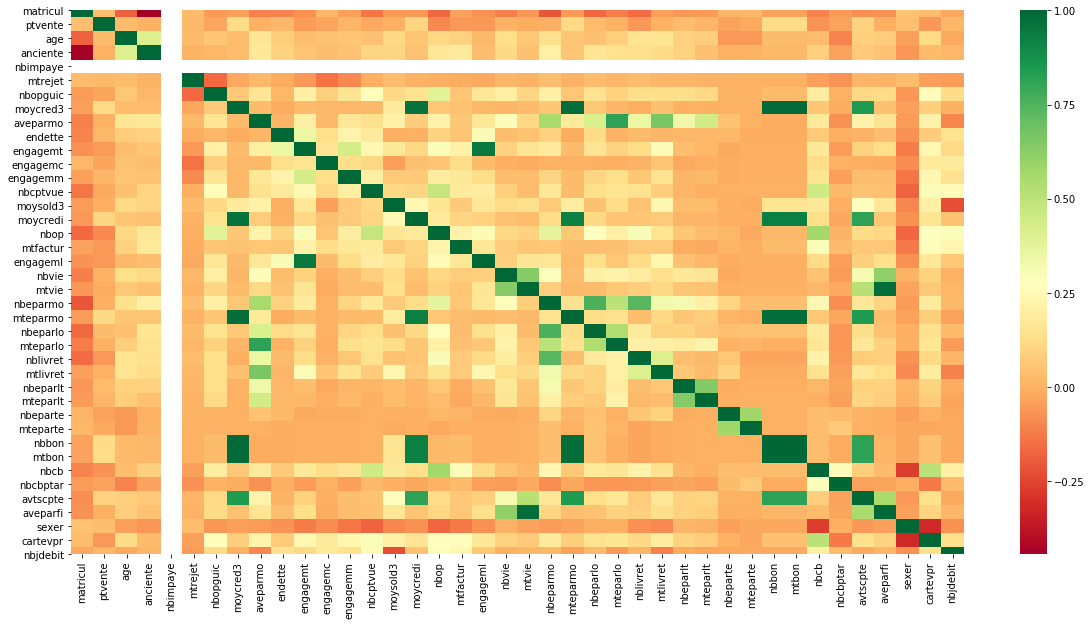

In [56]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(),cmap='RdYlGn')
fig=plt.gcf()
plt.show()

C:\Users\majda\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\majda\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


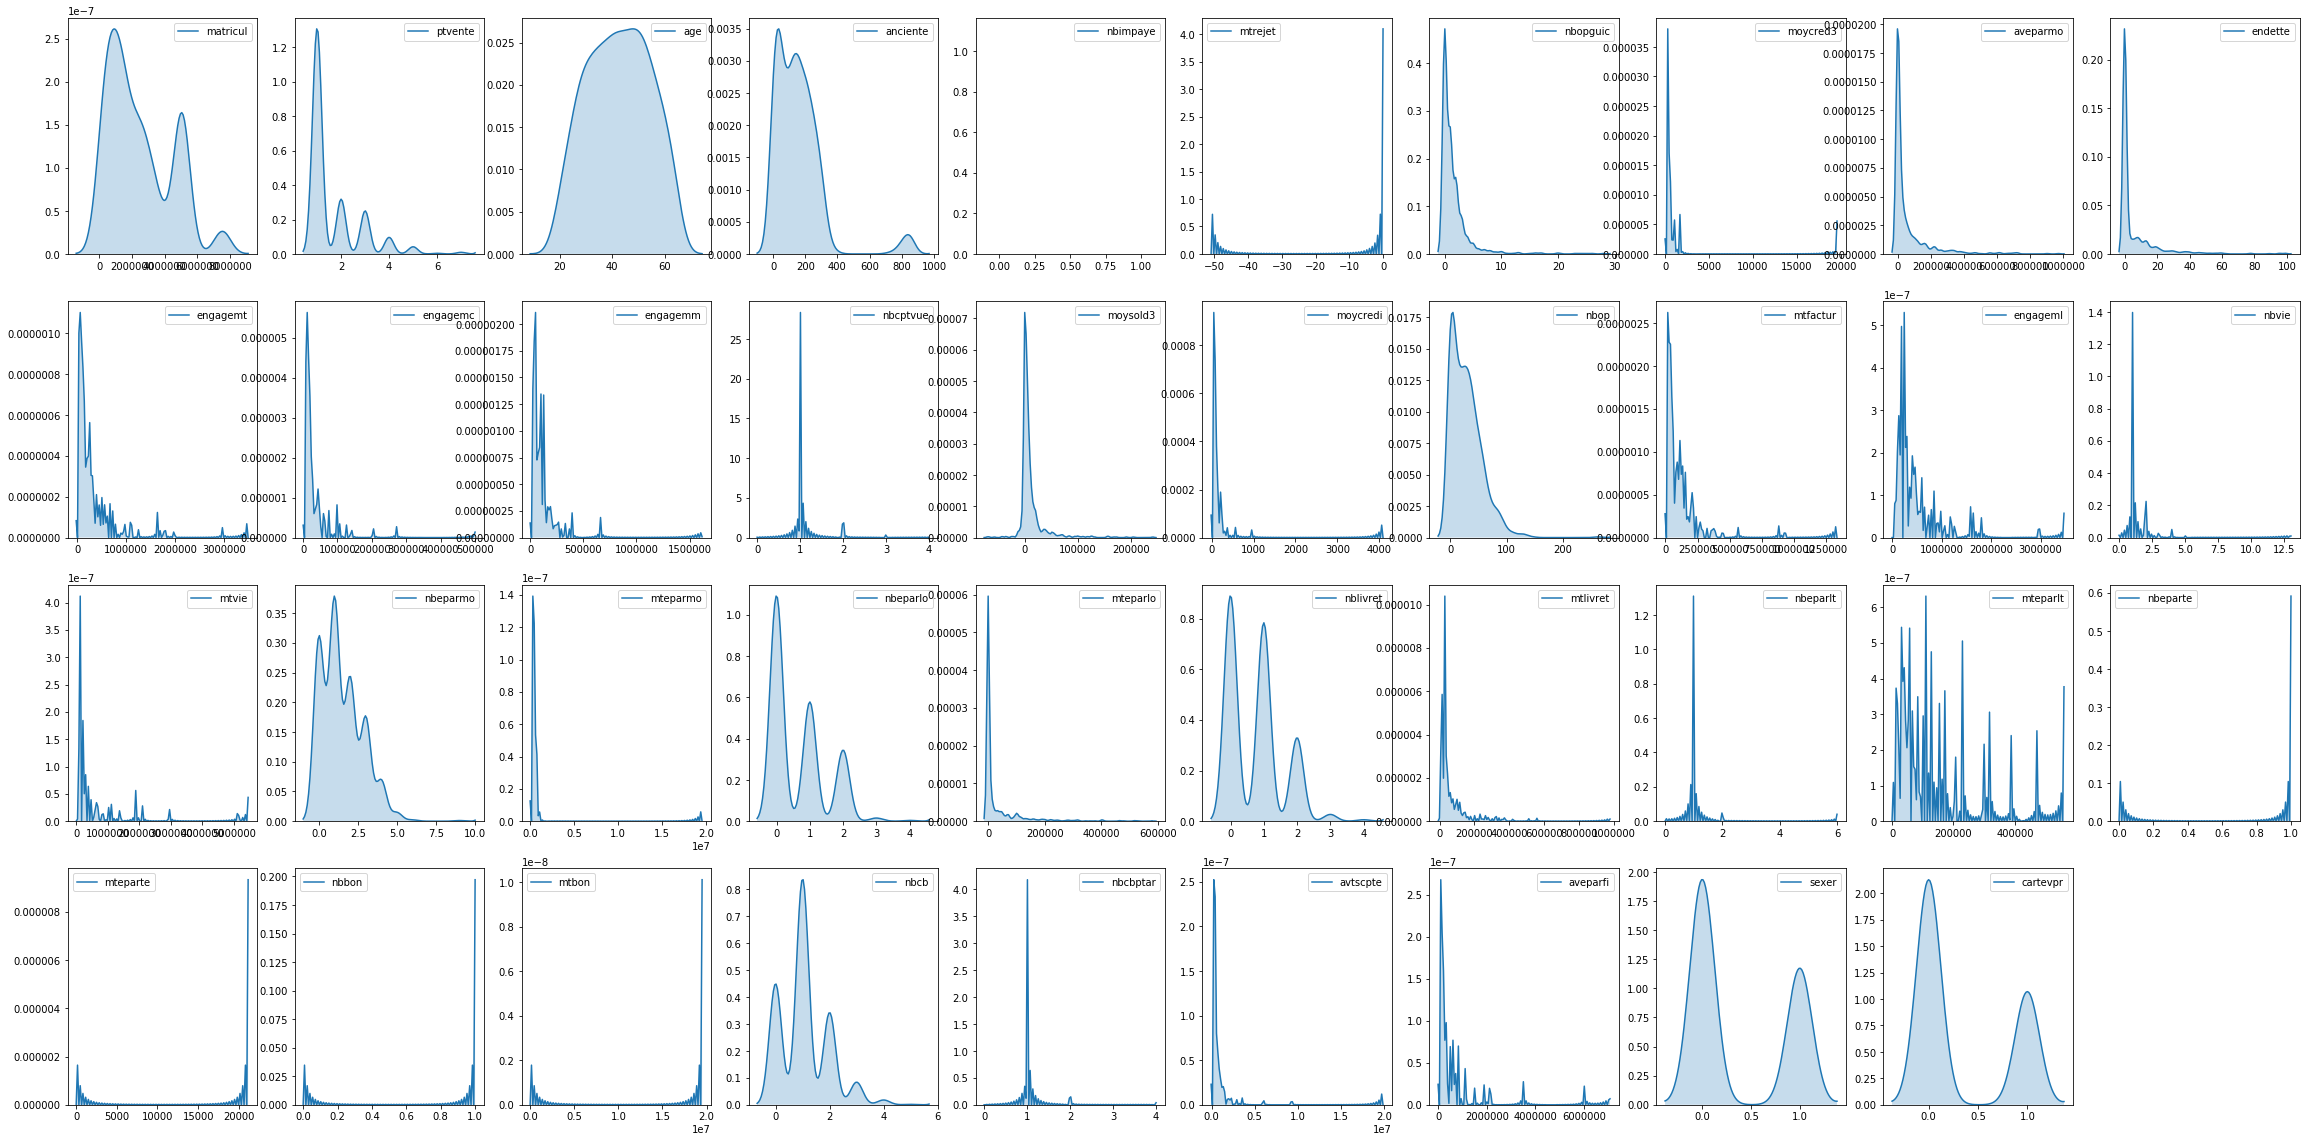

In [57]:
plt.figure(figsize=(40,20))
for i in range(39):
    plt.subplot(4, 10, i+1)
    with sns.plotting_context(font_scale=1):
        sns.kdeplot(df_num[df_num.columns[i]], shade=True)   
    


In [58]:
df_num.nbbon.value_counts()

0    1072
1       1
Name: nbbon, dtype: int64

In [109]:

df_num.nbeparte.value_counts()

0    1070
1       3
Name: nbeparte, dtype: int64

In [59]:
df_num.nbeparlt.value_counts()

0    1018
1      51
2       3
6       1
Name: nbeparlt, dtype: int64

In [71]:
df_num.mtbon.value_counts()

0           1072
19500000       1
Name: mtbon, dtype: int64

In [60]:
df_num.drop(['nbbon','nbeparte','cartevpr','matricul','nbeparlt','mtbon','mtrejet','nbimpaye'],axis=1,inplace=True)

In [138]:
Train_Y=df[['cartevpr']]

In [62]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(df_num)

In [63]:
PCA= PCA(n_components=3) 
X=PCA.fit_transform(X_scaled)

In [64]:
color=[]
for i in range(len(Y)):
    if Y.cartevpr[i]==1 :
        color.append('blue')
    else :
         color.append('red')

Text(0, 0.5, 'Troisieme composante principale')

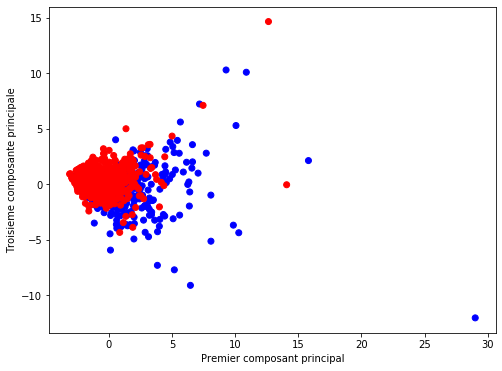

In [65]:
#acp avec les données standarisé
plt.figure (figsize = (8,6))
plt.scatter (X[:, 0], X[:, 2],c=color)
plt.xlabel ('Premier composant principal')
plt.ylabel ('Troisieme composante principale')

Text(0, 0.5, 'Deuxième composante principale')

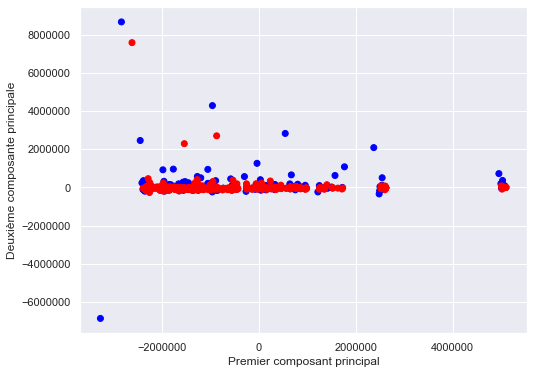

In [116]:
#acp avec les données non standarisé
plt.figure (figsize = (8,6))
plt.scatter (X[:, 0], X[:, 2],c=color)
plt.xlabel ('Premier composant principal')
plt.ylabel ('Deuxième composante principale')

# Application des algorithmes et évaluation

on a des variables avec des données categorielles et numériques et aussi avec differentes échelles donc on doit appliquer sur tout les algorithmes qui se base pas les arbre de decision comme Random forest ,Baggig boosting ... car parmis ces aventages


1. prise en compte simultanée de variables qualitatives et quantitatives(discrètes ou continues);
2. pas d'hypothèse au sujet des données (modèle non-paramétrique);
3. non affecté par les problèmes d'échelles de mesure des variables quantitatives (pas de combinaison arithmétique des variables) et détermine des seuils discriminants pour ces dernières;

In [177]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import  precision_recall_curve, auc, roc_curve, recall_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [134]:
Train_X = pd.concat([df_Cat, df_num], axis=1, sort=False)

In [135]:
Train_X.head()

,departem,sitfamil,csp,agemvt,codeqlt_A,codeqlt_B,codeqlt_C,codeqlt_D,codeqlt_E,ptvente,...,nblivret,mtlivret,mteparlt,mteparte,nbcb,nbcbptar,avtscpte,aveparfi,sexer,nbjdebit
0,31,3,2,11,1,0,0,0,0,1,...,2,181794,0,0,2,0,1303700,556967,0,1
1,82,3,2,11,1,0,0,0,0,6,...,0,0,0,0,2,0,19856243,133896,0,0
2,97,3,2,14,0,0,1,0,0,1,...,1,3402,0,0,1,0,122745,0,0,0
3,40,1,7,11,0,1,0,0,0,1,...,2,30009,0,0,2,0,83224,0,0,0
4,65,4,3,11,1,0,0,0,0,1,...,2,73351,0,0,3,1,494773,21423,0,15


In [140]:
print(Train_X.shape,Train_Y.shape)

(1073, 41) (1073, 1)


In [156]:
train_X, test_X, train_Y, test_Y = train_test_split(Train_X,Train_Y ,test_size=0.30,random_state=10)

In [157]:
modelRF= RandomForestClassifier(n_estimators=300,random_state=10)
modelRF.fit(train_X,train_Y )
predictionRF=modelRF.predict(test_X)

C:\Users\majda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


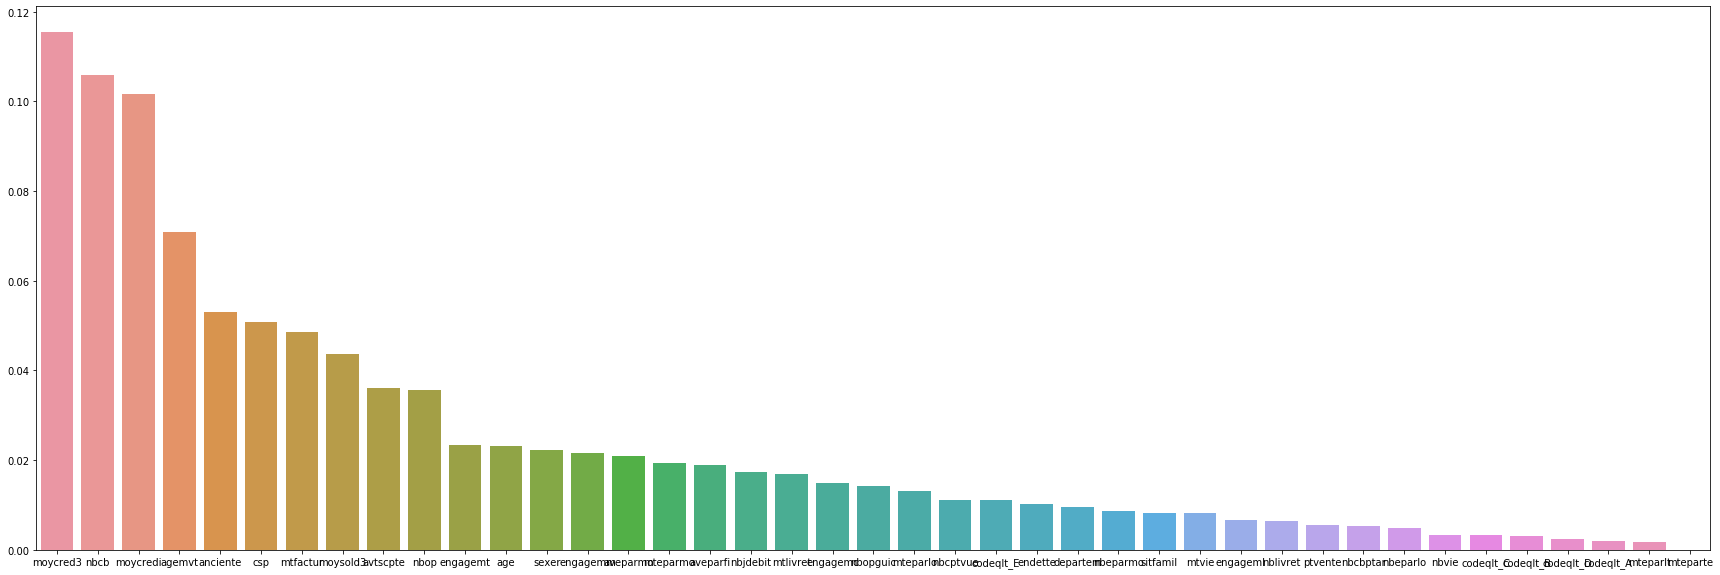

In [158]:
k=pd.Series(modelRF.feature_importances_,index=train_X.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(30,10))
sns.barplot(k.index,k.values)

In [159]:
k=pd.Series(modelRF.feature_importances_,index=train_X.columns).sort_values(ascending=False)
train_X=train_X.loc[:,k[:-7].index].reset_index(drop=True)
test_X=test_X.loc[:,k[:-7].index].reset_index(drop=True)

In [166]:
rf= RandomForestClassifier()
para_grids = {
              'n_estimators'      : [320,330,340],
              'max_depth'         : [8, 9, 10, 11, 12],
              'random_state'      : [0],
        }
skf = StratifiedKFold(n_splits=5)
RF= GridSearchCV(rf, para_grids,cv=skf)
RF.fit(train_X,train_Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                         

In [170]:
y_pred_prob_rf = RF.predict_proba(test_X)[:,1]
fpr_rf, tpr_rf, thresholds_lr = roc_curve(test_Y, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(test_Y, y_pred_prob_rf)

In [174]:
parameters = {'n_estimators':[50, 100, 150], 
              'learning_rate':[0.01, 0.03],
              'max_depth':[5,10,15],
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[3,5,7]}
skf = StratifiedKFold(n_splits=5)
clf=GradientBoostingClassifier(random_state=42)
gbc = GridSearchCV (clf, parameters,cv=skf)
gbc.fit(train_X, train_Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2...
                                                  random_state=42,
                                                  subsample=1.0, tol=0.0001,
           

In [175]:
y_pred_prob_gbc = gbc.predict_proba(test_X)[:,1]
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(test_Y, y_pred_prob_gbc)
roc_auc_gbc= auc(fpr_gbc, tpr_gbc)
precision_gbc, recall_gbc, th_gbc = precision_recall_curve(test_Y, y_pred_prob_gbc)

In [194]:
ExtraTreesClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [200]:
params = {'n_estimators':[500, 100, 150], 
              'max_depth':[5,10,30]
              }
skf = StratifiedKFold(n_splits=5)
ex=ExtraTreesClassifier(random_state=42)
ETC= GridSearchCV(ex, params,cv=skf)
ETC.fit(train_X, train_Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                              

In [202]:
y_pred_prob_etc = ETC.predict_proba(test_X)[:,1]
fpr_etc, tpr_etc, thresholds_etc= roc_curve(test_Y, y_pred_prob_etc)
roc_auc_etc = auc(fpr_etc, tpr_etc)
precision_etc, recall_etc, th_etc = precision_recall_curve(test_Y, y_pred_prob_etc)

In [205]:
parameters = {'n_estimators':[500, 1000, 1500], 
              'learning_rate':[0.01, 0.03, 0.05]}
skf = StratifiedKFold(n_splits=5)
clf=AdaBoostClassifier(random_state=42)
ADB = GridSearchCV (clf, parameters,cv=skf)
ADB.fit(train_X, train_Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.03, 0.05],
                         'n_estimators': [500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [207]:
y_pred_prob_adb = ADB.predict_proba(test_X)[:,1]
fpr_adb, tpr_adb, thresholds_adb= roc_curve(test_Y, y_pred_prob_adb)
roc_auc_adb = auc(fpr_adb, tpr_adb)
precision_adb, recall_adb, th_adb = precision_recall_curve(test_Y, y_pred_prob_adb)

In [208]:
parameters = {'n_estimators':[200, 100, 500], 
              'learning_rate':[0.01, 0.03, 0.05],
              'max_depth':[5,10,15],
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[3,5,7]}
skf = StratifiedKFold(n_splits=5)
clf=GradientBoostingClassifier(random_state=42)
gbc = GridSearchCV (clf, parameters,cv=skf)
gbc.fit(train_X, train_Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2...
                                                  random_state=42,
                                                  subsample=1.0, tol=0.0001,
           

In [209]:
y_pred_prob_gbc = gbc.predict_proba(test_X)[:,1]
fpr_gbc, tpr_gbc, thresholds_gbc= roc_curve(test_Y, y_pred_prob_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)
precision_gbc, recall_gbc, th_gbc = precision_recall_curve(test_Y, y_pred_prob_gbc)

In [210]:
clf = xgb.XGBClassifier()
parameters = {
    'n_estimators': [100, 250, 300],
    'nthread': [5,4],
    'max_depth': [3, 9, 12],
    'colsample_bytree': [0.9, 1.0]
}
skf = StratifiedKFold(n_splits=6)
grid = GridSearchCV(clf, parameters, verbose=2, n_jobs=-1,cv=skf)
grid.fit(train_X, train_Y)

Fitting 6 folds for each of 36 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   48.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.9, 1.0],
                         'max_depth': [3, 9, 12],

In [211]:
y_pred_prob_xgb = grid.predict_proba(test_X)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb= roc_curve(test_Y, y_pred_prob_xgb)
roc_auc_xgb= auc(fpr_xgb, tpr_xgb)
precision_xgb, recall_xgb, th_xgb = precision_recall_curve(test_Y, y_pred_prob_xgb)

In [217]:
parameters = {
    'n_estimators': [100, 250, 300],
    'nthread': [5,4],
    'max_depth': [3, 9, 12],
    'colsample_bytree': [0.9, 1.0]    }
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',)
skf = StratifiedKFold(n_splits=5)
grid = GridSearchCV(mdl, parameters, cv=skf, n_jobs=-1)
grid.fit(train_X, train_Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='depre

In [218]:
y_pred_prob_lgbm = grid.predict_proba(test_X)[:,1]
fpr_lgbm, tpr_lgbm, thresholds_lgbm= roc_curve(test_Y, y_pred_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
precision_lgbm, recall_lgbm, th_lgbm = precision_recall_curve(test_Y, y_pred_prob_lgbm)

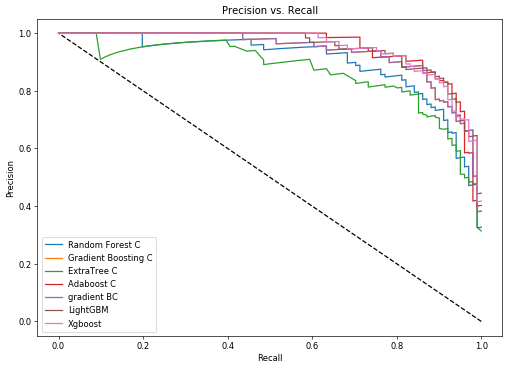

In [219]:
plt.figure(figsize=(10,7), dpi=60)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_rf, precision_rf, label='Random Forest C')
plt.plot(recall_gbc, precision_gbc, label='Gradient Boosting C')
plt.plot(recall_etc, precision_etc, label='ExtraTree C')
plt.plot(recall_adb, precision_adb, label='Adaboost C')
plt.plot(recall_gbc, precision_gbc, label='gradient BC')
plt.plot(recall_lgbm, precision_lgbm, label='LightGBM')
plt.plot(recall_xgb, precision_xgb, label='Xgboost')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

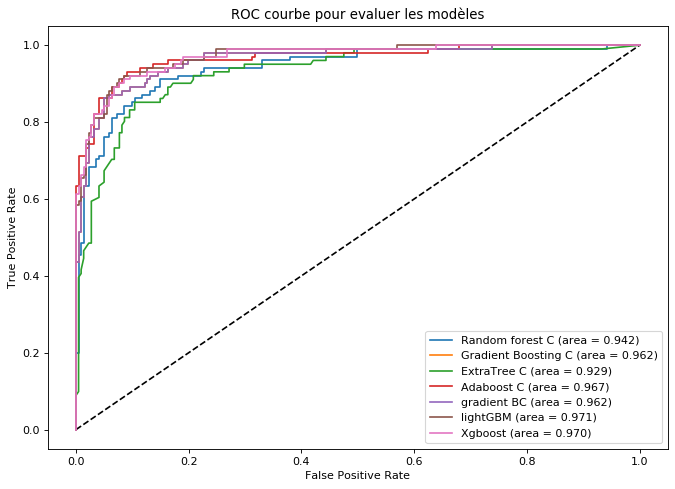

In [220]:
plt.figure(figsize=(10,7), dpi=80)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random forest C (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting C (area = %0.3f)' % roc_auc_gbc)
plt.plot(fpr_etc, tpr_etc, label='ExtraTree C (area = %0.3f)' % roc_auc_etc)
plt.plot(fpr_adb, tpr_adb, label='Adaboost C (area = %0.3f)' % roc_auc_adb)
plt.plot(fpr_gbc, tpr_gbc, label='gradient BC (area = %0.3f)' % roc_auc_gbc)
plt.plot(fpr_lgbm, tpr_lgbm, label='lightGBM (area = %0.3f)' % roc_auc_lgbm)
plt.plot(fpr_xgb, tpr_xgb, label='Xgboost (area = %0.3f)' % roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC courbe pour evaluer les modèles')
plt.legend(loc='best')
plt.show()